# Importações

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [6]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [42]:
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['species'] = [iris.target_names[i] for i in iris.target]
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


# Análise Exploratória dos Dados

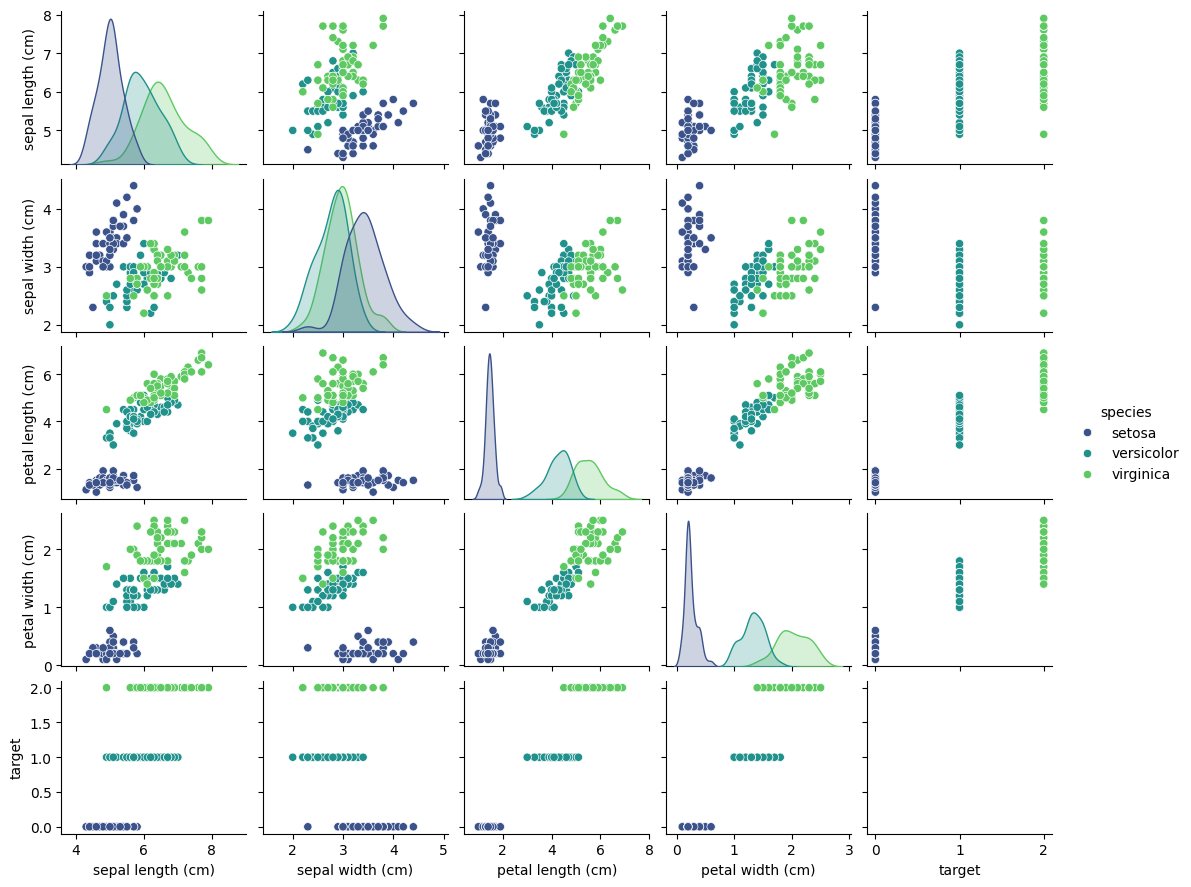

In [49]:
sns.pairplot(df_iris, hue='species', height=1.8, aspect=1.2, palette='viridis')
plt.show()

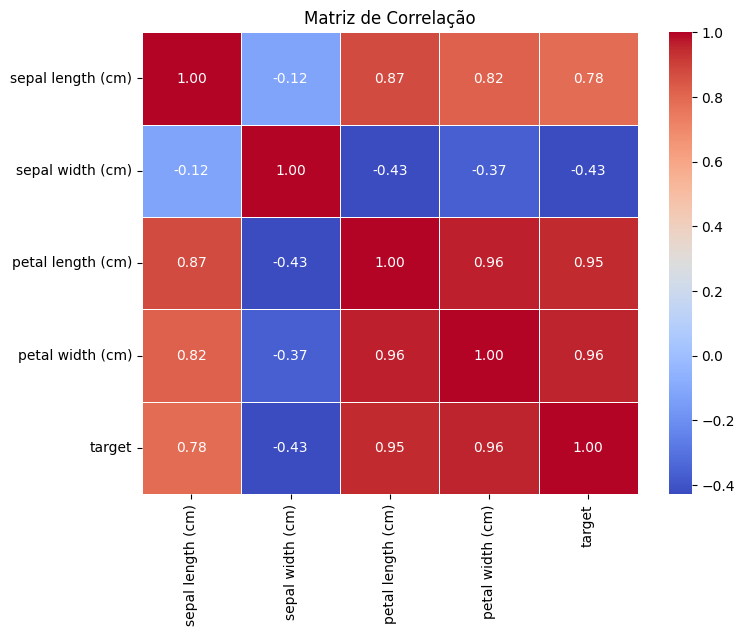

In [51]:
plt.figure(figsize=(8, 6))
corr_matrix = df_iris.drop(columns=['species']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Matriz de Correlação")
plt.show()

# Treinamento do Modelo

In [50]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
knn.score(X_test_scaled, y_test)

1.0

In [23]:
y_pred = knn.predict(X_test_scaled)
print("Predições do modelo: ", y_pred)
print("Respostas reais:     ", y_test)
knn.predict_proba(X_test_scaled[2].reshape(1, -1))

Predições do modelo:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Respostas reais:      [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


array([[0., 0., 1.]])

In [24]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



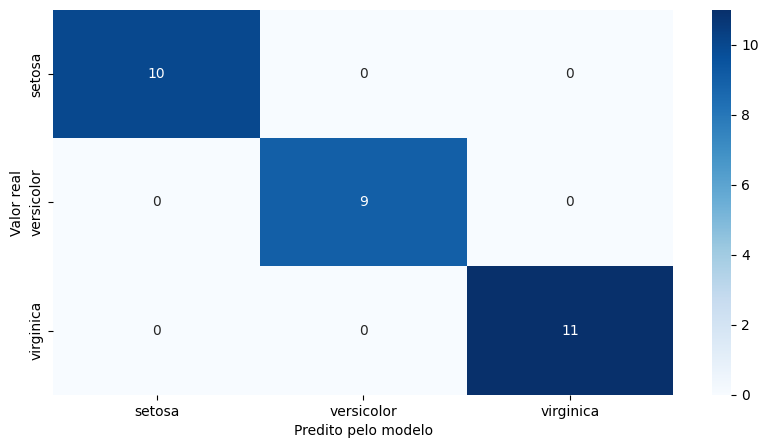

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predito pelo modelo")
plt.ylabel("Valor real")
plt.show()

In [30]:
cross_val_score(knn, X_train_scaled, y_train, cv=5)

array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.875     ])

In [31]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(knn, X_train_scaled, y_train, cv=5, random_state=41, return_times=True, n_jobs=-1)

In [32]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

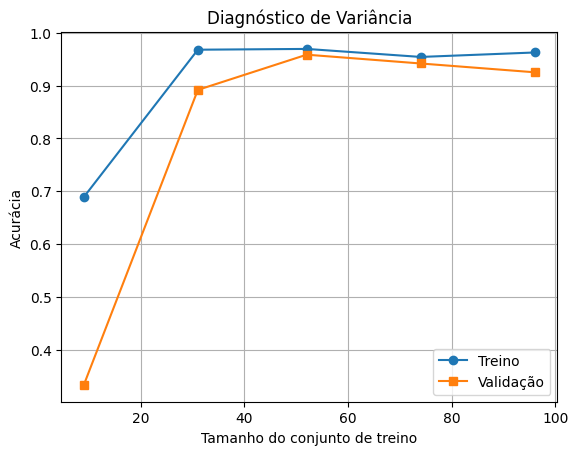

In [33]:
plt.plot(train_sizes, train_mean, label='Treino', marker='o')
plt.plot(train_sizes, test_mean, label='Validação', marker='s')

plt.title('Diagnóstico de Variância')
plt.xlabel('Tamanho do conjunto de treino')
plt.ylabel('Acurácia')
plt.legend()
plt.grid()
plt.show()

# Pipeline e Otimização

In [55]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(pipe.score(X_test, y_test))

1.0


In [78]:
params_grid = {'knn__n_neighbors': list(range(1, 30)), 'knn__weights': ['uniform', 'distance']}
grid_search = GridSearchCV(
    pipe,
    params_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [94]:
grid_search.fit(X_train, y_train)
gs_result = pd.DataFrame(grid_search.cv_results_)
gs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005186,0.000204,0.008411,0.000644,1,uniform,"{'knn__n_neighbors': 1, 'knn__weights': 'unifo...",0.958333,1.000000,0.833333,0.958333,0.958333,0.941667,0.056519,21
1,0.004749,0.000676,0.004602,0.000431,1,distance,"{'knn__n_neighbors': 1, 'knn__weights': 'dista...",0.958333,1.000000,0.833333,0.958333,0.958333,0.941667,0.056519,21
2,0.003583,0.000578,0.006794,0.001139,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.958333,0.916667,0.875000,1.000000,0.916667,0.933333,0.042492,36
3,0.003188,0.000625,0.003386,0.001074,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.958333,1.000000,0.833333,0.958333,0.958333,0.941667,0.056519,21
4,0.003356,0.000579,0.007643,0.001153,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,5
5,0.004215,0.000671,0.004665,0.000785,3,distance,"{'knn__n_neighbors': 3, 'knn__weights': 'dista...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,5
6,0.004220,0.000341,0.007580,0.000910,4,uniform,"{'knn__n_neighbors': 4, 'knn__weights': 'unifo...",0.916667,0.958333,0.875000,1.000000,0.916667,0.933333,0.042492,36
7,0.004830,0.002108,0.005687,0.001582,4,distance,"{'knn__n_neighbors': 4, 'knn__weights': 'dista...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,5
8,0.004027,0.001093,0.009340,0.002572,5,uniform,"{'knn__n_neighbors': 5, 'knn__weights': 'unifo...",0.958333,0.958333,0.833333,1.000000,0.916667,0.933333,0.056519,36
9,0.004274,0.000337,0.005064,0.000308,5,distance,"{'knn__n_neighbors': 5, 'knn__weights': 'dista...",0.958333,1.000000,0.833333,1.000000,0.958333,0.950000,0.061237,5


In [95]:
grid_search.best_params_

{'knn__n_neighbors': 9, 'knn__weights': 'distance'}

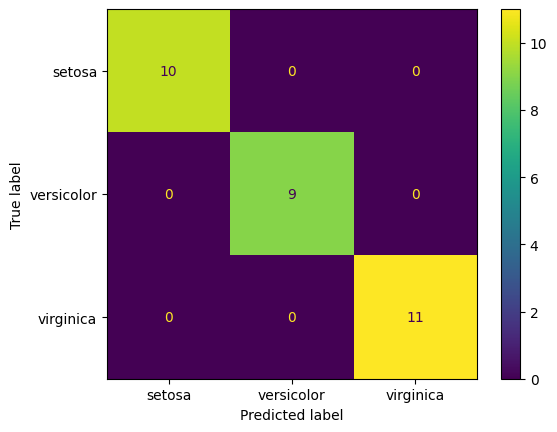

In [96]:
best_model = grid_search.best_estimator_
y_pred_otimized = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_otimized)
ConfusionMatrixDisplay(cm, display_labels=iris.target_names).plot()

In [100]:
pd.DataFrame(classification_report(y_test, y_pred_otimized, output_dict=True))

,0,1,2,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,10.0,9.0,11.0,1.0,30.0,30.0
